In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import helper
import pathlib
import pandas as pd
import torch
import torch.nn as nn
import torchvision
import scipy
import sklearn
import sklearn.linear_model
import sklearn.ensemble
import xgboost as xgb
from xgboost.sklearn import XGBRegressor

# These two lines allow us to change the helper file and reload the notebook without killing the kernel everytime.
%load_ext autoreload
%autoreload 2

# Data analysis part

In [8]:
df = pd.read_csv('../datas/data/Output-S2-1.csv', header=None)
df = df.dropna(axis=0)
round(df.describe() ,4) 

,0,1,2,3,4,5,6,7,8
count,31249.0000,31249.0000,31249.0000,31249.0000,31249.0000,31249.0000,31249.0000,31249.0000,31249.0000
mean,0.5917,0.5951,0.3994,0.5046,2.4053,2.3984,0.4025,0.5086,1.1434
std,0.2281,0.2287,0.3456,0.2869,0.9226,0.9241,0.3456,0.2856,9.4102
min,0.2000,0.2001,-0.2000,0.0100,0.8000,0.8001,-0.1999,0.0100,0.0621
25%,0.3941,0.3967,0.0993,0.2571,1.6109,1.5994,0.1049,0.2591,0.3974
50%,0.5897,0.5943,0.4005,0.5033,2.4068,2.3970,0.4040,0.5137,0.6133
75%,0.7889,0.7935,0.6981,0.7531,3.2088,3.1943,0.7024,0.7552,0.7903
max,0.9899,0.9900,0.9999,1.0000,3.9999,4.0000,1.0000,1.0000,1438.2300


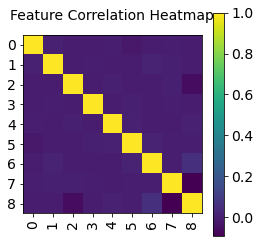

In [6]:
helper.show_heatmap(df)

In [4]:
# Data analysis of the data bellow the threshold of the first data set.
# All datas from the first data set:
threshold = 10000

# x0 data:
x0 = df.iloc[:threshold, 0].values

# x1 data: 
x1 = df.iloc[:threshold, 1].values

# x2 data:
x2 = df.iloc[:threshold, 2].values

# x3 data:
x3 = df.iloc[:threshold, 3].values

# x4-x5 data:
x4 = df.iloc[:threshold, 4].values
x5 = df.iloc[:threshold, 5].values

# x6 data:
x6 = df.iloc[:threshold, 6].values

# x7 data:
x7 = df.iloc[:threshold, 7].values

# y data:
y = df.iloc[:threshold, 8].values

# All features and colors used for the plots
features = [x0, x1, x2, x3, x4, x5, x6, x7]
colors = ['tab:blue', 'tab:orange','tab:green','tab:red','tab:purple','tab:brown','tab:pink', 'tab:gray']

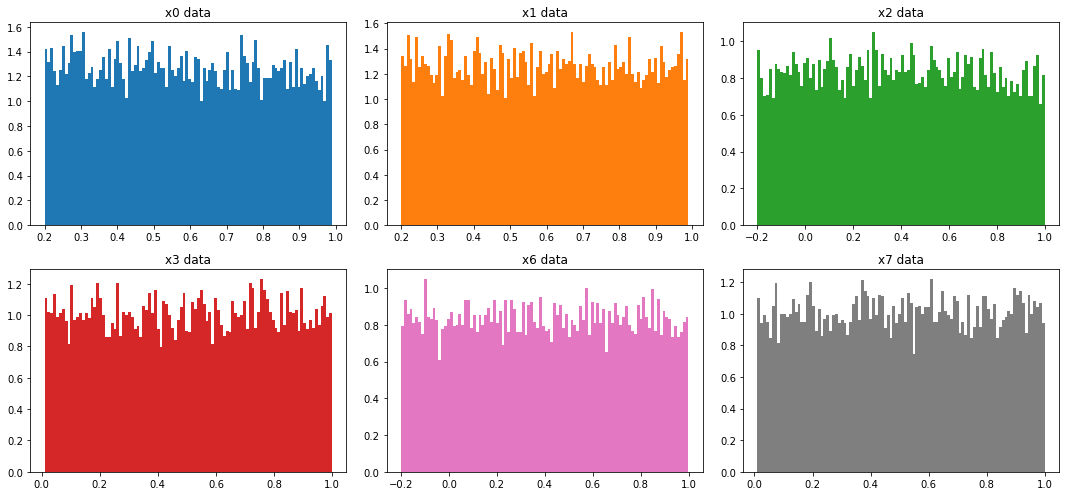

In [5]:
# Plot of the distribution of the data
n_bins = 100
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 7))
indices = [0, 1, 2, 3, 6, 7]

for ax, i in zip(axes.flat, indices):
    ax.hist(features[i], n_bins, color=colors[i], density=1)
    ax.set_title('x%s data' %i)

fig.tight_layout()
plt.show()

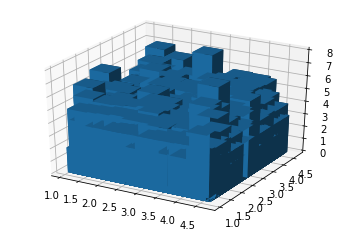

mean = 2.4 | std = 0.8533333333333335


In [6]:
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
hist, xedges, yedges = np.histogram2d(x4, x5, bins=75, range=[[0.8, 4], [0.8, 4]])

xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0
# Construct arrays with the dimensions for the 16 bars.
dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')
plt.show()
print('mean =',mean45,'|','std =', std45)

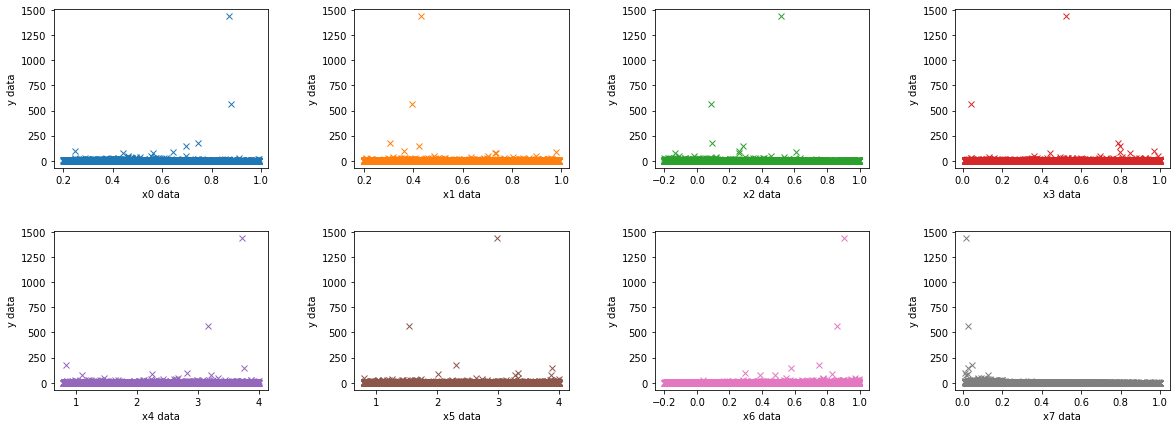

In [7]:
# All plots for xs against y with outliers:
fig, axs = plt.subplots(2, 4, figsize=(20,7))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for ax, i in zip(axs.flat, range(8)):
    ax.plot(features[i], y, 'x', color=colors[i])
    ax.set(xlabel='x%s data' %i, ylabel='y data')


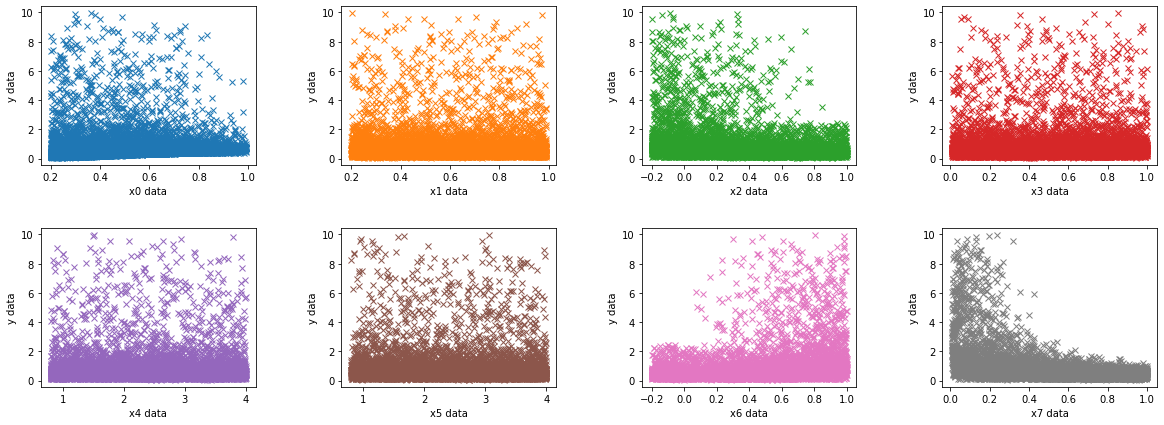

In [8]:
# All plots for xs against y without outliers:
fig, axs = plt.subplots(2, 4, figsize=(20,7))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

list_indices = range(len(y))
indices_greater_10 = [j for (i, j) in zip(y, list_indices) if i < 10]
y_bis = y[indices_greater_10]

for ax, i in zip(axs.flat, range(8)):
    ax.plot(features[i][indices_greater_10], y_bis, 'x', color=colors[i])
    ax.set(xlabel='x%s data' %i, ylabel='y data')

# Data used for all machine learning models:

In [12]:
datas = []
entries = pathlib.Path('../datas/data/')

for entry in entries.iterdir():
    df = pd.read_csv(entry, header=None)
    df = df.dropna(axis=0)
    if type(df.iloc[0,0]) == type('str'):
        df = df.iloc[1:]
    df = df.astype('float64')
    datas.append(df)

df_concat = pd.concat(datas)
df_concat.to_csv('../datas/all_datas.csv')

# Data used for Regression

In [66]:
# preparing the data and parameters for cross correlation.
x = df_concat.iloc[:,0:8].values
y = df_concat.iloc[:,-1].values
seed = 1
k_fold = 4
k_indices = helper.build_k_indices(y, k_fold, seed)

# Test Lasso 

In [72]:
# Linear regression using the LassoCV model from sklearn.linear_model
helper.cross_correlation_regression(y, x, k_indices, k_fold, sklearn.linear_model.LassoCV(positive=True), sklearn.metrics.mean_absolute_error)


k = 0 and loss= 1.051156 and coef= [0.     0.     0.     0.019  0.0535 0.     1.5721 0.    ]
k = 1 and loss= 1.041174 and coef= [0.     0.     0.     0.0526 0.07   0.     1.612  0.    ]
k = 2 and loss= 1.071636 and coef= [0.     0.     0.     0.     0.0602 0.     1.5864 0.    ]
k = 3 and loss= 1.042395 and coef= [0.     0.     0.     0.0522 0.0522 0.     1.6081 0.    ]


## Test Classic Linear regression

In [64]:
# Linear regression using the LinearRegression model from sklearn.linear_model
helper.cross_correlation_regression(y, x, k_indices, k_fold, sklearn.linear_model.LinearRegression(), sklearn.metrics.mean_squared_error)


k = 0 and loss= 25.982628 and coef= [ 0.     -0.3597 -0.166  -1.6155  0.0435  0.0555 -0.0308  1.5908 -3.0252]
k = 1 and loss= 28.869132 and coef= [ 0.     -0.3717 -0.2025 -1.6144  0.0391  0.0683 -0.0241  1.6092 -3.0498]
k = 2 and loss= 102.970709 and coef= [ 0.     -0.3668 -0.2111 -1.5679  0.0099  0.0621 -0.0083  1.6048 -2.9848]
k = 3 and loss= 39.950786 and coef= [ 0.     -0.3705 -0.1891 -1.6352  0.0485  0.0526 -0.0257  1.6094 -3.0428]


## Test SGDRegressor

In [65]:
# Linear regression using the SGDRegressor model from sklearn.linear_model, we use l1 as penalty because we found out the loss was smaller.
helper.cross_correlation_regression(y, x, k_indices, k_fold, sklearn.linear_model.SGDRegressor(penalty='l1'), sklearn.metrics.mean_absolute_error)

k = 0 and loss= 1.135935 and coef= [ 1.3457 -0.3927 -0.1731 -1.5578  0.      0.0158 -0.0122  1.5126 -2.9404]
k = 1 and loss= 1.274754 and coef= [ 1.4031 -0.2808 -0.1921 -1.611   0.0716  0.1256 -0.0635  1.6535 -3.1063]
k = 2 and loss= 1.158415 and coef= [ 1.2933 -0.3759 -0.2189 -1.5369  0.      0.0383  0.      1.5166 -2.8852]
k = 3 and loss= 1.222651 and coef= [ 1.3624 -0.386  -0.1763 -1.5956  0.      0.0979  0.      1.5982 -3.021 ]


## Testing with XGboost

In [13]:
# Linear regression using the XGBRegressor model from XGboost
helper.cross_correlation_boost(y, x, k_indices, k_fold, XGBRegressor(verbosity=0), sklearn.metrics.mean_squared_error)

k = 0 and Loss= 26.726748
k = 1 and Loss= 30.443847
k = 2 and Loss= 98.739795
k = 3 and Loss= 42.127461


# Neural Network part

In [13]:
train_ratio = 0.60
i = int(df_concat.shape[0] * train_ratio)
train_set = df_concat[0:i]
test_set = df_concat[i:] 

X_train = train_set.iloc[:,0:8].values
y_train = train_set.iloc[:,-1].values

X_test = test_set.iloc[:,0:8].values
y_test = test_set.iloc[:,-1].values

# If a GPU is available use cuda else use cpu
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

## CNN

In [134]:
# Definition of some hyperparameters taken from lab10
learning_rate = 1e-3
num_epochs = 10
batch_size = 32

dataset_train_tensor = torch.utils.data.TensorDataset(torch.from_numpy(X_train).unsqueeze(1).float(), torch.from_numpy(y_train).unsqueeze(1).float())
dataset_test_tensor= torch.utils.data.TensorDataset(torch.from_numpy(X_test).unsqueeze(1).float(), torch.from_numpy(y_test).unsqueeze(1).float())

dataset_train = torch.utils.data.DataLoader(dataset_train_tensor, batch_size=batch_size)
dataset_test = torch.utils.data.DataLoader(dataset_test_tensor, batch_size=100)

In [135]:
class OTCmodel(nn.Module):
    """
    Convolutional neural network, with the architecture inspire from LeNet but with different parameters.
    """
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv1d(1, 30, kernel_size=3, padding=1)
        self.conv2 = nn.Conv1d(30, 60, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(120, 20)
        self.conv_drop = torch.nn.Dropout()
        self.fc2 = nn.Linear(20, 1)

    def forward(self, x):
        relu = nn.functional.relu
        max_pool1d = torch.nn.functional.max_pool1d

        x = relu(max_pool1d(self.conv1(x), 2))
        x = relu(max_pool1d(self.conv_drop(self.conv2(x)), 2))
        x = x.view(-1, 120)
        x = relu(self.fc1(x))
        x = self.fc2(x)
        return x  

In [136]:
model_otc = OTCmodel().to(device)

# Defining the loss function and the optimizer the best to use is adam()
criterion = nn.L1Loss()
optimizer = torch.optim.Adam(model_otc.parameters(), lr=learning_rate)

# training, this phase is pretty long and take around 5min
helper.train(model_otc, criterion, dataset_train, dataset_test, optimizer, num_epochs, helper.MAE, device)


Starting training
Epoch 0 | Test MAE: 0.44255
Epoch 1 | Test MAE: 0.44584
Epoch 2 | Test MAE: 0.43317
Epoch 3 | Test MAE: 0.44058
Epoch 4 | Test MAE: 0.43601
Epoch 5 | Test MAE: 0.43138
Epoch 6 | Test MAE: 0.44001
Epoch 7 | Test MAE: 0.42169
Epoch 8 | Test MAE: 0.41320
Epoch 9 | Test MAE: 0.41501


## Fully Connected Neural Network

In [14]:
learning_rate = 1e-3
num_epochs = 10
batch_size = 1024

dataset_train_tensor = torch.utils.data.TensorDataset(torch.from_numpy(X_train).float(), torch.from_numpy(y_train).unsqueeze(1).float())
dataset_test_tensor= torch.utils.data.TensorDataset(torch.from_numpy(X_test).float(), torch.from_numpy(y_test).unsqueeze(1).float())

dataset_train = torch.utils.data.DataLoader(dataset_train_tensor, batch_size=batch_size)
dataset_test = torch.utils.data.DataLoader(dataset_test_tensor, batch_size=batch_size)

In [15]:
class LinearOTC(nn.Module):
    """
    Fully connected neural network, the architecture is inspire from the paper: https://arxiv.org/pdf/1904.10523.pdf (page 20)
    """
    def __init__(self):
        super(LinearOTC, self).__init__()
        self.fc1 = nn.Linear(8, 200)
        self.fc2 = nn.Linear(200, 200)
        self.fc3 = nn.Linear(200, 1)
        self.drop = nn.Dropout(p=0.0)
    
    def forward(self, x):
        relu = nn.functional.relu
        x = relu(self.drop(self.fc1(x)))
        for i in range(3):
            x = relu(self.drop(self.fc2(x)))
        x = self.fc3(x)
        return x

In [16]:
model = LinearOTC().to(device)

# Defining the loss function and the optimizer the best to use is adam()
criterion = nn.L1Loss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# training, this phase is pretty long and take around 5min
helper.train(model, criterion, dataset_train, dataset_test, optimizer, num_epochs, helper.MAE, device)


Starting training
Epoch 0 | Test MAE: 0.42975
Epoch 1 | Test MAE: 0.36105
Epoch 2 | Test MAE: 0.31505
Epoch 3 | Test MAE: 0.29563
Epoch 4 | Test MAE: 0.28001
Epoch 5 | Test MAE: 0.27383
Epoch 6 | Test MAE: 0.27685
Epoch 7 | Test MAE: 0.27793
Epoch 8 | Test MAE: 0.28210
Epoch 9 | Test MAE: 0.28148


## Find theta that minimize the function we train during the Fully connected Neural Network part

In [138]:
def f(x):
    """Function which going to be minimize. Take a 8 dimensions np.array, transform it in a tensor and evaluate. 
    Args:
        x (np.array): 8 dimensions array.

    Returns:
        float: result of the Neural network model after applying x.
    """
    x = torch.from_numpy(x).float()

    return model(x).detach().numpy()[0]

In [215]:
# Searching for the minimum of the function using scipy.optimize.minimize. 
# Because the function is not convexe, we are only going to find local minima so we are trying different random initalisation vectors.
all_min = []
minimum = []
shortest_distance = 10
it = 500
for i in range(it):
    np.random.seed(i)
    res = scipy.optimize.minimize(f, np.random.rand(8), bounds=((0, 1), (0, 1), (0, None), (0, None), (0, None), (0, None), (0, None), (0, None)))
    local_min = res['x']
    distance = model(torch.tensor(local_min).float()).detach().numpy()[0]
    if distance > 0:
        all_min.append(local_min)
        if distance < shortest_distance:
            shortest_distance = distance
            minimum = local_min

In [216]:
print(f"Average theta of all minima found: {np.mean(np.array(all_min), axis=0)}")
print(f"Minimum theta found after {it} iterations: {minimum} for a minimum distance of {shortest_distance}")

Average theta of all minima found: [0.49351445 0.5121332  0.57824497 0.55201408 0.5384454  0.56573811
 0.50505377 0.65892854]
Minimum theta found after 500 iterations: [0.07515134 0.77991879 0.43840923 0.72346518 0.97798951 0.53849587
 0.50112046 0.0840618 ] for a minimum distance of 0.004572339355945587
